In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from acquire import get_titanic_data
from prepare import prep_titanic_data

df = prep_titanic_data(get_titanic_data())

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 13 columns):
passenger_id       714 non-null int64
survived           714 non-null int64
pclass             714 non-null int64
sex                714 non-null object
age                714 non-null float64
sibsp              714 non-null int64
parch              714 non-null int64
fare               714 non-null float64
embarked           714 non-null object
class              714 non-null object
embark_town        714 non-null object
alone              714 non-null int64
embarked_encode    714 non-null int64
dtypes: float64(2), int64(7), object(4)
memory usage: 78.1+ KB


In [2]:
df.dropna(inplace=True) # handle missing age values

X = df[['pclass','age','fare','sibsp','parch']]
y = df[['survived']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)

X_train.head()

,pclass,age,fare,sibsp,parch
60,3,22.0,7.2292,0,0
348,3,3.0,15.9000,1,1
606,3,30.0,7.8958,0,0
195,1,58.0,146.5208,0,0
56,2,21.0,10.5000,0,0


### Train Model
#### Create KNN Object

In [3]:
# weights = ['uniform', 'density']
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
# choosing to be closest to five nearest neighbors
# could weight features

#### Fit the model to the training data

In [4]:
knn.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

#### Estimate whether or not a passenger would survive, using the training data

In [5]:
y_pred = knn.predict(X_train)

#### Estimate the probability of a passenger surviving, using the training data

In [6]:
y_pred_proba = knn.predict_proba(X_train)

### Evaluate Model
#### Compute the accuracy

In [7]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.76


#### Create a confusion matrix

In [8]:
print(confusion_matrix(y_train, y_pred))

[[239  54]
 [ 65 141]]


#### Compute Precision, Recall, F1-score, and Support

In [9]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       293
           1       0.72      0.68      0.70       206

   micro avg       0.76      0.76      0.76       499
   macro avg       0.75      0.75      0.75       499
weighted avg       0.76      0.76      0.76       499



### Test Model
#### Compute the accuracy of the model when run on the test data

In [10]:
print('Accuracy of KNN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN classifier on test set: 0.67


### Visualize Model

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.

([<matplotlib.axis.XTick at 0x1a1c507978>,
 <a list of 5 Text xticklabel objects>)

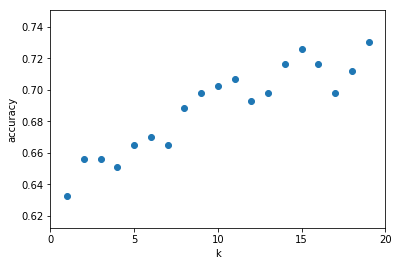

In [11]:
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])
# if increase k too much, will overfit model
# This shows list of accuracy of models as k increases
# if there is a big difference between training and test data,
# then I've overfit model.

### Store Model

In [12]:
%store knn
# this stores it so that it can be used in another model, but we won't 
# be doing this.

Stored 'knn' (KNeighborsClassifier)
